In [48]:
%pip install scipy
import kagglehub
import pandas as pd
import os 
import seaborn as sns 
from scipy.stats import linregress

# Download latest version
path = kagglehub.dataset_download("bhadramohit/climate-change-dataset")
file_path = os.path.join(path, "climate_change_dataset.csv") 

print("Path to dataset files:", path)
df = pd.read_csv(file_path) 
df.head()

# Upload to S3

6834.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: /Users/student/.cache/kagglehub/datasets/bhadramohit/climate-change-dataset/versions/1


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [49]:
import math

In [ ]:
features = ['Year', 'Country', 'Extreme Weather Events',
             'Avg Temperature (°C)', 'Sea Level Rise (mm)' ]
df_clean_2 = df[features]

df_clean_2.head(10)

df.columns



Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

Top 3 countries with the fastest rising temperatures: ['Canada', 'Mexico', 'Indonesia']


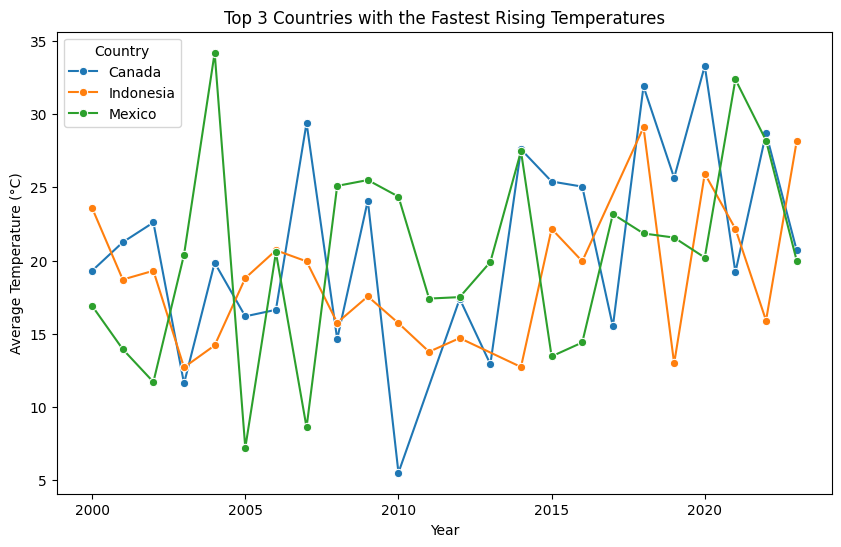

In [76]:
df_temp_trend = df.groupby(["Year", "Country"])["Avg Temperature (°C)"].mean().reset_index()

country_slopes = {}

for country in df_temp_trend["Country"].unique():
    temp_data = df_temp_trend[df_temp_trend["Country"] == country]
    
    if len(temp_data) > 1:  # Ensure enough data for trend calculation
        slope, _, _, _, _ = linregress(temp_data["Year"], temp_data["Avg Temperature (°C)"])
        
        if slope > 0:  # Only consider countries with increasing trends
            country_slopes[country] = slope

top_countries = sorted(country_slopes, key=country_slopes.get, reverse=True)[:3]

print("Top 3 countries with the fastest rising temperatures:", top_countries)

if not top_countries:
    print("No countries found with a rising temperature trend.")
else:
    df_top_rising = df_temp_trend[df_temp_trend["Country"].isin(top_countries)]

    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_top_rising, x="Year", y="Avg Temperature (°C)", hue="Country", marker="o")

    plt.xlabel("Year")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Top 3 Countries with the Fastest Rising Temperatures")
    plt.legend(title="Country")
    plt.show()

Top 3 countries with the fastest sea level rise: ['Argentina', 'Mexico', 'France']


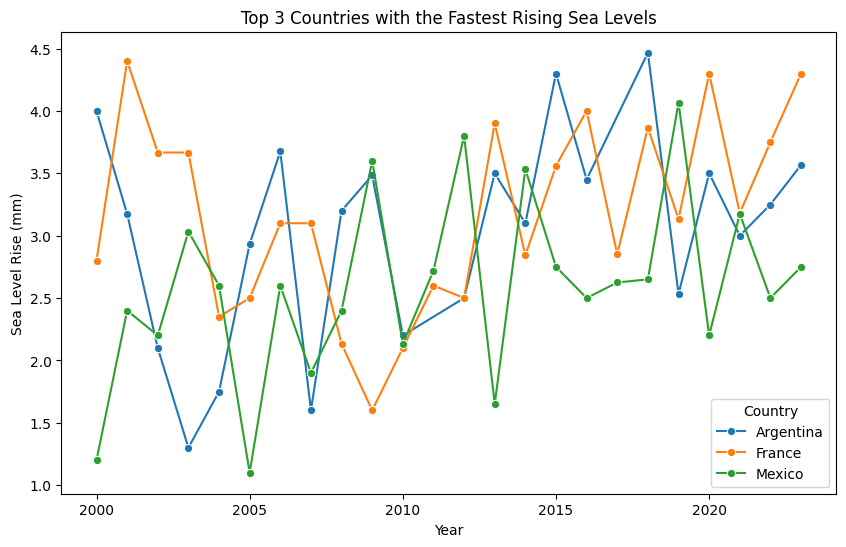

In [77]:
df_sea_level_trend = df.groupby(["Year", "Country"])["Sea Level Rise (mm)"].mean().reset_index()

country_slopes = {}

for country in df_sea_level_trend["Country"].unique():
    sea_level_data = df_sea_level_trend[df_sea_level_trend["Country"] == country]
    
    if len(sea_level_data) > 1:  # Ensure enough data for trend calculation
        slope, _, _, _, _ = linregress(sea_level_data["Year"], sea_level_data["Sea Level Rise (mm)"])
        
        if slope > 0:  # Only consider countries with increasing trends
            country_slopes[country] = slope

top_countries = sorted(country_slopes, key=country_slopes.get, reverse=True)[:3]

print("Top 3 countries with the fastest sea level rise:", top_countries)

if not top_countries:
    print("No countries found with a rising sea level trend.")
else:
    df_top_rising_sea = df_sea_level_trend[df_sea_level_trend["Country"].isin(top_countries)]

    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_top_rising_sea, x="Year", y="Sea Level Rise (mm)", hue="Country", marker="o")

    plt.xlabel("Year")
    plt.ylabel("Sea Level Rise (mm)")
    plt.title("Top 3 Countries with the Fastest Rising Sea Levels")
    plt.legend(title="Country")
    plt.show()

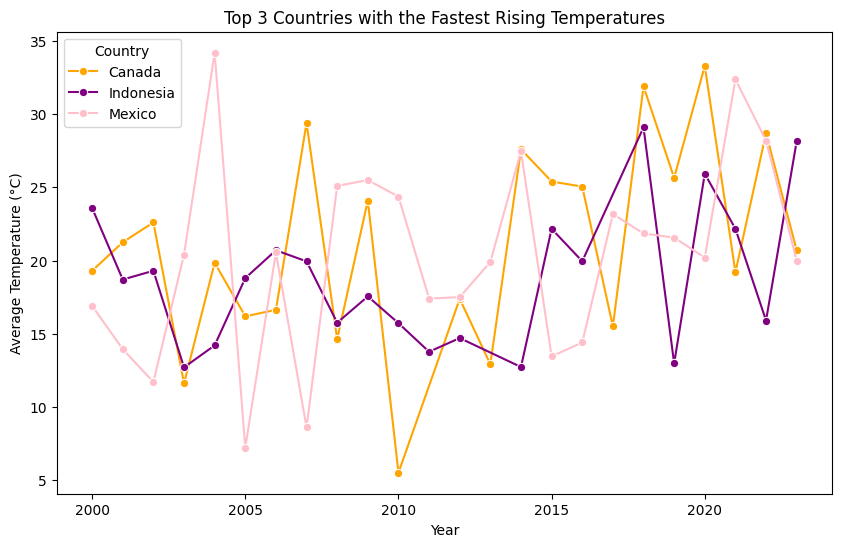

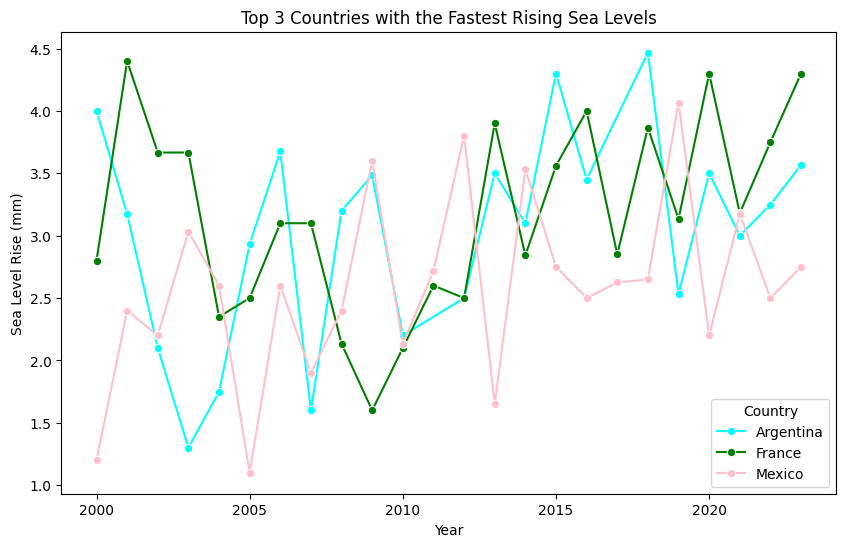

In [79]:
country_colors = {
    "USA": "red",
    "China": "blue",
    "France": "green",
    "Indonesia": "purple",
    "Canada": "orange",
    "Argentina": "cyan",
    "Mexico": "pink",
    "Australia": "brown"
}

top_countries_temp = ["Indonesia", "Canada", "Mexico"]  # Replace with your actual top 3 temp countries
top_countries_sea = ["Argentina", "France", "Mexico"]  # Replace with your actual top 3 sea level countries

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising, x="Year", y="Avg Temperature (°C)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_temp})
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Top 3 Countries with the Fastest Rising Temperatures")
plt.legend(title="Country")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising_sea, x="Year", y="Sea Level Rise (mm)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_sea})
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (mm)")
plt.title("Top 3 Countries with the Fastest Rising Sea Levels")
plt.legend(title="Country")
plt.show()

Top 3 countries with the fastest rising CO₂ emissions: ['Mexico', 'Russia', 'UK']


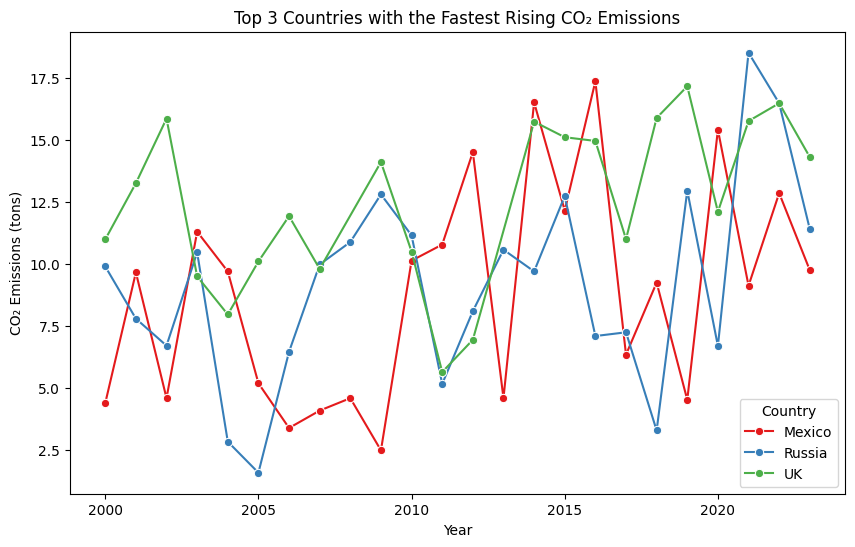

In [78]:
df_co2_trend = df.groupby(["Year", "Country"])["CO2 Emissions (Tons/Capita)"].mean().reset_index()

# Dictionary to store CO₂ emission slopes
co2_slopes = {}

# Compute slope (rate of CO₂ emission increase) for each country
for country in df_co2_trend["Country"].unique():
    co2_data = df_co2_trend[df_co2_trend["Country"] == country]
    
    if len(co2_data) > 1:  # Ensure enough data for trend calculation
        slope, _, _, _, _ = linregress(co2_data["Year"], co2_data["CO2 Emissions (Tons/Capita)"])
        
        if slope > 0:  # Only consider countries with increasing CO₂ trends
            co2_slopes[country] = slope

# Sort countries by slope (highest increase first) and pick top 3
top_countries_co2 = sorted(co2_slopes, key=co2_slopes.get, reverse=True)[:3]

print("Top 3 countries with the fastest rising CO₂ emissions:", top_countries_co2)

# If no rising countries found, exit early
if not top_countries_co2:
    print("No countries found with a rising CO₂ emission trend.")
else:
    # Filter data for only the top 3 rising CO₂ countries
    df_top_rising_co2 = df_co2_trend[df_co2_trend["Country"].isin(top_countries_co2)]

    # Plot
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_top_rising_co2, x="Year", y="CO2 Emissions (Tons/Capita)", 
                 hue="Country", marker="o", palette="Set1")

    plt.xlabel("Year")
    plt.ylabel("CO₂ Emissions (tons)")
    plt.title("Top 3 Countries with the Fastest Rising CO₂ Emissions")
    plt.legend(title="Country")
    plt.show()



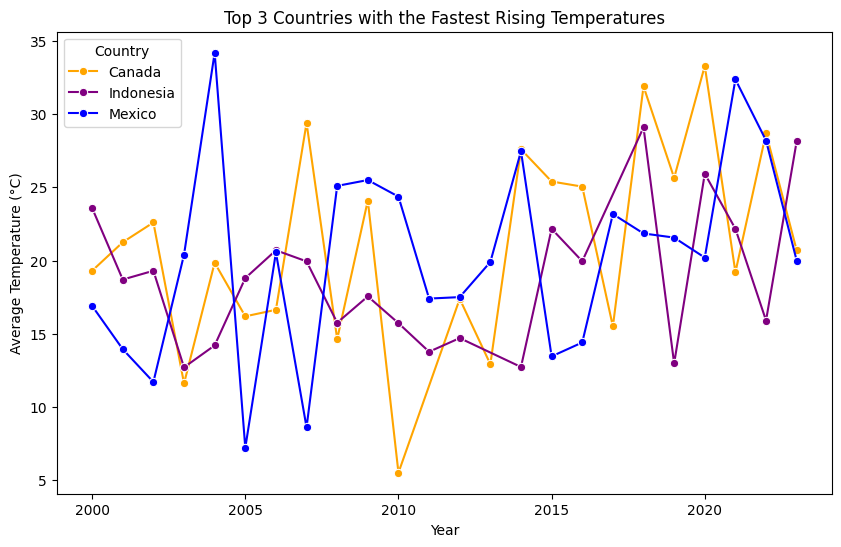

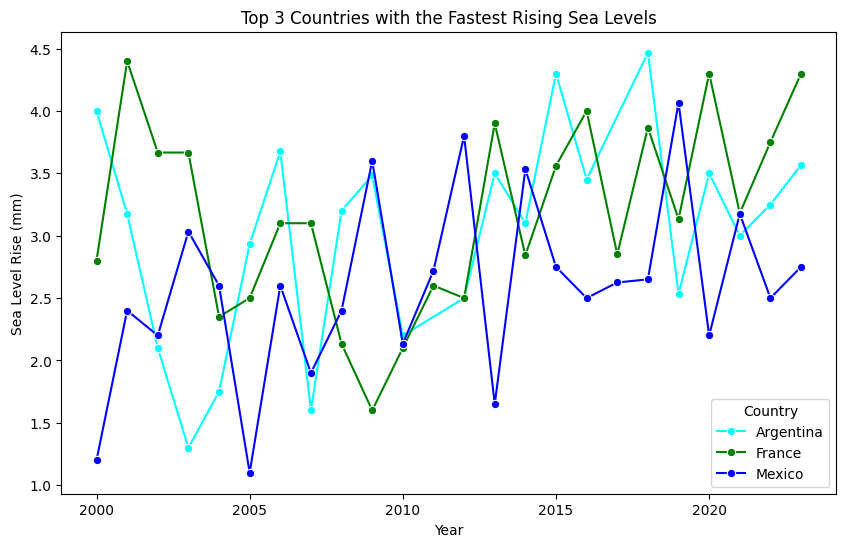

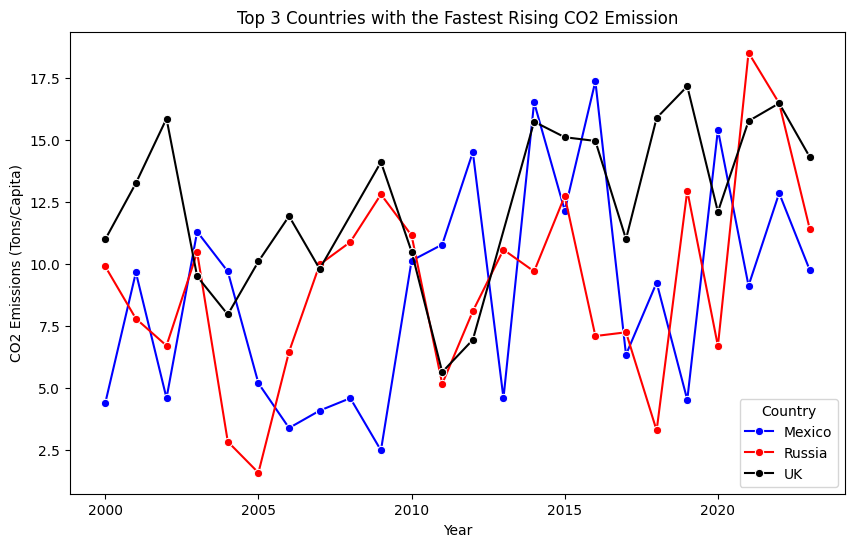

In [84]:
country_colors = {
    "Russia": "red",
    "China": "pink",
    "France": "green",
    "Indonesia": "purple",
    "Canada": "orange",
    "Argentina": "cyan",
    "Mexico": "blue",
    "UK": "black"
}

top_countries_temp = ["Indonesia", "Canada", "Mexico"]  # Replace with your actual top 3 temp countries
top_countries_sea = ["Argentina", "France", "Mexico"]  # Replace with your actual top 3 sea level countries
top_countries_co2 = ["Mexico", "Russia","UK"]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising, x="Year", y="Avg Temperature (°C)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_temp})
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Top 3 Countries with the Fastest Rising Temperatures")
plt.legend(title="Country")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising_sea, x="Year", y="Sea Level Rise (mm)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_sea})
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (mm)")
plt.title("Top 3 Countries with the Fastest Rising Sea Levels")
plt.legend(title="Country")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising_co2, x="Year", y="CO2 Emissions (Tons/Capita)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_co2})
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.title("Top 3 Countries with the Fastest Rising CO2 Emission")
plt.legend(title="Country")
plt.show()